# Prediction Data EDA

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# expanding csv import size to max

import sys
import csv
maxInt = sys.maxsize
overflow = True

while overflow:
    try:
        csv.field_size_limit(maxInt)
        overflow = False
    except OverflowError:
        maxInt = int(maxInt/10)

## Prediction Data

***Inaugural Addresses***

In [3]:
# Importing and viewing inauguration address data

inaug = pd.read_csv('../data/prediction_data/raw_pred_data/inaugural_speeches.csv', engine = 'python')
inaug.head(2)

,Unnamed: 0,Name,Inaugural Address,Date,text
0,4,George Washington,First Inaugural Address,"Thursday, April 30, 1789",Fellow-Citizens of the Senate and o...
1,5,George Washington,Second Inaugural Address,"Monday, March 4, 1793",Fellow Citizens: I AM again cal...


In [4]:
# dropping index and inaug address columns and converting to datetime

inaug.drop(columns = ['Unnamed: 0', 'Inaugural Address'], inplace = True)
inaug['Date'] = pd.to_datetime(inaug['Date'])
inaug.head(2)

,Name,Date,text
0,George Washington,1789-04-30,Fellow-Citizens of the Senate and o...
1,George Washington,1793-03-04,Fellow Citizens: I AM again cal...


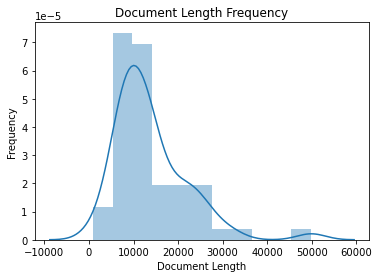

In [5]:
inaug_lengths = []
for text in inaug['text']:
    inaug_lengths.append(len(text))
    
sns.distplot(inaug_lengths)
plt.xlabel('Document Length')
plt.ylabel('Frequency')
plt.title('Document Length Frequency');

In [6]:
# exporting to csv

inaug.to_csv('../data/prediction_data/formatted_pred_data/inaugural_formatted.csv', index = False)

***State of the Union Addresses***

In [7]:
# setting url and grabbing page with SOTU speech links (urls)

url = 'https://www.presidency.ucsb.edu/documents/presidential-documents-archive-guidebook/annual-messages-congress-the-state-the-union'
res = requests.get(url)
res.status_code

200

In [8]:
# extracting URL table

soup = BeautifulSoup(res.content, "lxml")
table = soup.find('table')
table.text[:200]

'Table of All State of the Union Messages and Addresses\nPresident\nYears of term\n\xa0Delivered as a Speech (Address)\n\xa0 \xa0 \xa0 \xa0 \xa0 \xa0 Delivered as a Written Message\n\xa0\n\xa0\n1st\n2nd\n3rd\n4th\nend 4th\n1st\n2nd\n3rd\n4th\ne'

In [9]:
# Extracting web data into usable dataframe

speeches = []
current_pres = ''
for row in table.find_all('tr')[3 : -13]: 
    if row.find('td').text.strip() != '':
        current_pres = row.find('td').text.strip()
    for element in row.find_all('a'):
        try:
            speeches.append([current_pres, element.attrs['href'].strip(), element.text.strip()])
        except:
            pass
sotu_speeches = pd.DataFrame(speeches, columns = ['President', 'Speech', 'Year'])
sotu_speeches[:5]

,President,Speech,Year
0,Donald J. Trump,https://www.presidency.ucsb.edu/ws/index.php?p...,2017
1,Donald J. Trump,https://www.presidency.ucsb.edu/documents/addr...,2018
2,Donald J. Trump,https://www.presidency.ucsb.edu/documents/addr...,2019
3,Donald J. Trump,https://www.presidency.ucsb.edu/documents/addr...,2020
4,Barack Obama,https://www.presidency.ucsb.edu/ws/index.php?p...,2013


In [10]:
# investigating import error - how many bad urls compared to 244 rows above?

sum(['https' in x for x in sotu_speeches['Speech']])

243

In [11]:
# Extracting speeches from individual URL's

speeches = []
i = 1
total = sum(['https' in x for x in sotu_speeches['Speech']])
for url in sotu_speeches['Speech']:
    if 'https' in url:
        res = requests.get(url)
        assert res.status_code == 200
        soup = BeautifulSoup(res.content, "lxml")
        paragraphs = []
        for paragraph in soup.find_all('p'):
            paragraphs.append(paragraph.text.strip())
        speeches.append(paragraphs)
        if i ==1 or i % 10 == 0:
            print(f'Pulling speech {i}/{total}')
        i += 1
        time.sleep(2)

Pulling speech 1/243
Pulling speech 10/243
Pulling speech 20/243
Pulling speech 30/243
Pulling speech 40/243
Pulling speech 50/243
Pulling speech 60/243
Pulling speech 70/243
Pulling speech 80/243
Pulling speech 90/243
Pulling speech 100/243
Pulling speech 110/243
Pulling speech 120/243
Pulling speech 130/243
Pulling speech 140/243
Pulling speech 150/243
Pulling speech 160/243
Pulling speech 170/243
Pulling speech 180/243
Pulling speech 190/243
Pulling speech 200/243
Pulling speech 210/243
Pulling speech 220/243
Pulling speech 230/243
Pulling speech 240/243


In [12]:
# data was pulled in paragraphs, seeing if there are any head/tail cleaning needed

pd.DataFrame(speeches).head(3)

,0,1,2,3,4,5,6,7,8,9,...,724,725,726,727,728,729,730,731,732,733
0,About Search,,"Thank you very much. Mr. Speaker, Mr. Vice Pre...",Each American generation passes the torch of t...,What we are witnessing today is the renewal of...,"In 9 years, the United States will celebrate t...",I will not allow the mistakes of recent decade...,"We've defended the borders of other nations, w...","Then, in 2016, the Earth shifted beneath our f...",But then the quiet voices became a loud chorus...,...,None,None,None,None,None,None,None,None,None,None
1,About Search,,"The President. Mr. Speaker, Mr. Vice President...","Over the last year, we have made incredible pr...",Each test has forged new American heroes to re...,We heard tales of Americans like Coast Guard P...,We heard about Americans like firefighter Davi...,Some trials over the past year touched this Ch...,"In the aftermath of that terrible shooting, we...","Since the election, we have created 2.4 millio...",...,None,None,None,None,None,None,None,None,None,None
2,About Search,,"Madam Speaker, Mr. Vice President, Members of ...",We meet tonight at a moment of unlimited poten...,Millions of our fellow citizens are watching u...,The agenda I will lay out this evening is not ...,Many of us have campaigned on the same core pr...,There is a new opportunity in American politic...,"This year, America will recognize two importan...","In June, we mark 75 years since the start of w...",...,None,None,None,None,None,None,None,None,None,None


In [13]:
# Ensuring that the first two paragraphs are the same in all records before dropping 

print(pd.DataFrame([x[0] for x in speeches])[0].value_counts())
print(pd.DataFrame([x[1] for x in speeches])[0].value_counts())

About Search    243
Name: 0, dtype: int64
    243
Name: 0, dtype: int64


In [14]:
# Looking at tail value symmetry for records

end_values = []
for speech in speeches:
    end_values.append(speech[-10:])
    
pd.DataFrame(end_values[:4])    

,0,1,2,3,4,5,6,7,8,9
0,"When we fulfill this vision, when we celebrate...","From now on, America will be empowered by our ...",I am asking all citizens to embrace this renew...,"Thank you, God bless you, and God bless the Un...",NOTE: The President spoke at 9:09 p.m. in the ...,"Donald J. Trump, Address Before a Joint Sessio...",The American Presidency ProjectJohn Woolley an...,Twitter Facebook,Copyright © The American Presidency ProjectTer...,
1,They work in every trade. They sacrifice to ra...,Americans fill the world with art and music. T...,As long as we are proud of who we are and what...,Thank you. And God bless America. Goodnight.,NOTE: The President spoke at 9:10 p.m. in the ...,"Donald J. Trump, Address Before a Joint Sessio...",The American Presidency ProjectJohn Woolley an...,Twitter Facebook,Copyright © The American Presidency ProjectTer...,
2,This is the time to reignite the American imag...,"This is our future, our fate, and our choice t...","No matter the trials we face, no matter the ch...",We must keep America first in our hearts. We m...,Thank you. God bless you. And God bless Americ...,"Donald J. Trump, Address Before a Joint Sessio...",The American Presidency ProjectJohn Woolley an...,Twitter Facebook,Copyright © The American Presidency ProjectTer...,
3,America is the place where anything can happen...,"This Nation is our canvas, and this country is...","Our spirit is still young, the Sun is still ri...","Thank you, God bless you, and God bless Americ...",NOTE: The President spoke at 9:06 p.m. in the ...,"Donald J. Trump, Address Before a Joint Sessio...",The American Presidency ProjectJohn Woolley an...,Twitter Facebook,Copyright © The American Presidency ProjectTer...,


In [15]:
# Getting rid of first 2 and last 5 paragraphs for each speech - no relevant data

trimmed = []
for speech in speeches:
    trimmed.append(speech[2:-5])
    
trimmed[0][0][:200]

'Thank you very much. Mr. Speaker, Mr. Vice President, Members of Congress, the First Lady of the United States, and citizens of America: Tonight, as we mark the conclusion of our celebration of Black '

In [16]:
# Creating a copy of trimmed, iterating between it and a 3rd copy of trimmed,
# and removing if it is in the list of common/administrative trail elements 

speeches_trimmed = trimmed.copy()
speeches_trimmed_2 = []

toggle = True

for _ in range(10):
    if toggle:
        speeches_trimmed_2 = []
        for speech in speeches_trimmed:
            if ('APP Note' in speech[-1]) | ('Note:' in speech[-1]) | (speech[-1] == '') | ('EDITORIAL' in speech[-1]) | ('* White' in speech[-1]) | ('Earlier in the day' in speech[-1]) | ('NOTE:' in speech[-1]) | ('On the same day an advance text of the' in speech[-1])| ('The White house also released the' in speech[-1])| ('The President spoke from a prepared text' in speech[-1])| ('Delivered in person before a joint' in speech[-1])| ('The Address as reported from the floor' in speech[-1])| ('As delivered in person before a joint' in speech[-1])| ('As printed above' in speech[-1]) | ('An advance text of the president' in speech[-1]) | ('The APP thanks Dr. Daniel Stowell' in speech[-1]) | ('We thank Dr. Daniel W. Stowell' in speech[-1]):
                speeches_trimmed_2.append(speech[:-1])
            else:
                speeches_trimmed_2.append(speech)
        toggle = False
    else:
        speeches_trimmed = []
        for speech in speeches_trimmed_2:
            if ('APP Note' in speech[-1]) | ('Note:' in speech[-1]) | (speech[-1] == '') | ('EDITORIAL' in speech[-1]) | ('* White' in speech[-1]) | ('Earlier in the day' in speech[-1]) | ('NOTE:' in speech[-1]) | ('On the same day an advance text of the' in speech[-1])| ('The White house also released the' in speech[-1])| ('The President spoke from a prepared text' in speech[-1])| ('Delivered in person before a joint' in speech[-1])| ('The Address as reported from the floor' in speech[-1])| ('As delivered in person before a joint' in speech[-1])| ('As printed above' in speech[-1]) | ('An advance text of the president' in speech[-1]) | ('The APP thanks Dr. Daniel Stowell' in speech[-1]) | ('We thank Dr. Daniel W. Stowell' in speech[-1]):
                speeches_trimmed.append(speech[:-1])
            else:
                speeches_trimmed.append(speech)
        toggle = True

In [17]:
# checking most frequent last lines to ensure code above did as expected

test_check = []
for speech in speeches_trimmed:
    test_check.append(speech[-1])

pd.DataFrame(test_check)[0].value_counts()[:7]

DWIGHT D. EISENHOWER                                                                                                                                                                                                                                                     8
Goodnight.                                                                                                                                                                                                                                                               4
Thank you, God bless you, and God bless America.                                                                                                                                                                                                                         3
We pray that we may be worthy of the unlimited opportunities that God has given us.                                                                                                                    

In [18]:
# making sure that there are no single trail values that still need removing

[x[-1][:65] for x in speeches_trimmed]

['Thank you, God bless you, and God bless the United States.',
 'Thank you. And God bless America. Goodnight.',
 'Thank you. God bless you. And God bless America. Thank you very m',
 'Thank you, God bless you, and God bless America. Thank you very m',
 'Thank you. God bless you, and God bless these United States of Am',
 'God bless you, and God bless the United States of America.',
 'Thank you. God bless you. God bless this country we love. Thank y',
 'Thank you. God bless you. God bless the United States of America.',
 'Thank you. God bless you, and may God bless the United States of ',
 'Thank you. God bless you, and God bless the United States of Amer',
 'Thank you. God bless you, and may God bless the United States of ',
 'Thank you, God bless you, and God bless the United States of Amer',
 'Thank you, and may God bless America.',
 'May God bless America.',
 'See you next year. Thank you for your prayers.',
 "So tonight, with confidence in freedom's power and trust in the p",
 'Tha

In [19]:
# Joining all paragraphs within each speech to form full speeches

speeches_joined = []

for speech in speeches_trimmed:
    speeches_joined.append(' \n '.join(speech))

In [20]:
# making sure speeches were joined sucessfully - no longer list of lists - one string speech only

print(len(speeches_joined[0]))
print(type(speeches_joined[0]))

29267
<class 'str'>


In [21]:
# removing record that did not have a URL so df can be rejoined with speech data

sotu_speeches['Speech'][51]

'#nixon1973'

In [22]:
sotu_speeches.drop(index = 51, inplace = True)

In [23]:
# renaming Speech to URL to avoid confusion upon joining with speech data

sotu_speeches.rename(columns = {'Speech' : 'URL'}, inplace = True)

In [24]:
# adding speeches

sotu_speeches['Text'] = speeches_joined
sotu_speeches.head(2)

,President,URL,Year,Text
0,Donald J. Trump,https://www.presidency.ucsb.edu/ws/index.php?p...,2017,"Thank you very much. Mr. Speaker, Mr. Vice Pre..."
1,Donald J. Trump,https://www.presidency.ucsb.edu/documents/addr...,2018,"The President. Mr. Speaker, Mr. Vice President..."


In [25]:
# adding speech length column

sotu_speeches['Speech_length'] = [len(x) for x in sotu_speeches['Text']]

In [26]:
# addressing datetime conversion issues

[x for x in sotu_speeches['Year'] if len(x) > 4] 

['1956‡']

In [27]:
sotu_speeches[sotu_speeches['Year'] == '1956‡']

,President,URL,Year,Text,Speech_length
74,Dwight D. Eisenhower,https://www.presidency.ucsb.edu/ws/index.php?p...,1956‡,[Recorded on film and tape and broadcast the s...,6271


In [28]:
sotu_speeches.loc[74 , 'Year'] = '1956'

In [29]:
sotu_speeches[sotu_speeches['Year'] == '1956‡']

,President,URL,Year,Text,Speech_length


In [30]:
sotu_speeches[sotu_speeches['Year'] == '‡']

,President,URL,Year,Text,Speech_length
76,Dwight D. Eisenhower,https://www.presidency.ucsb.edu/ws/index.php?p...,‡,[Recorded on film and tape and broadcast the s...,6271
86,Franklin D. Roosevelt,https://www.presidency.ucsb.edu/ws/index.php?p...,‡,[Recorded on film and tape and broadcast the s...,6271
88,Franklin D. Roosevelt,https://www.presidency.ucsb.edu/ws/index.php?p...,‡,[Recorded on film and tape and broadcast the s...,6271


In [31]:
# dropping recording records of speeches (unwanted data)

sotu_speeches.drop(index = [76 , 86, 88], inplace = True)

In [32]:
# converting to datetime and sorting by date

sotu_speeches['Year'] = [x.year for x in pd.to_datetime(sotu_speeches['Year'])]

In [33]:
sotu_speeches.sort_values('Year', ascending = True, inplace = True)

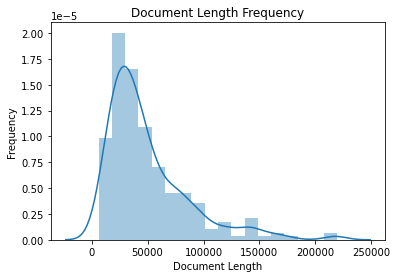

In [57]:
sns.distplot(sotu_speeches['Speech_length'])
plt.xlabel('Document Length')
plt.ylabel('Frequency')
plt.title('Document Length Frequency');

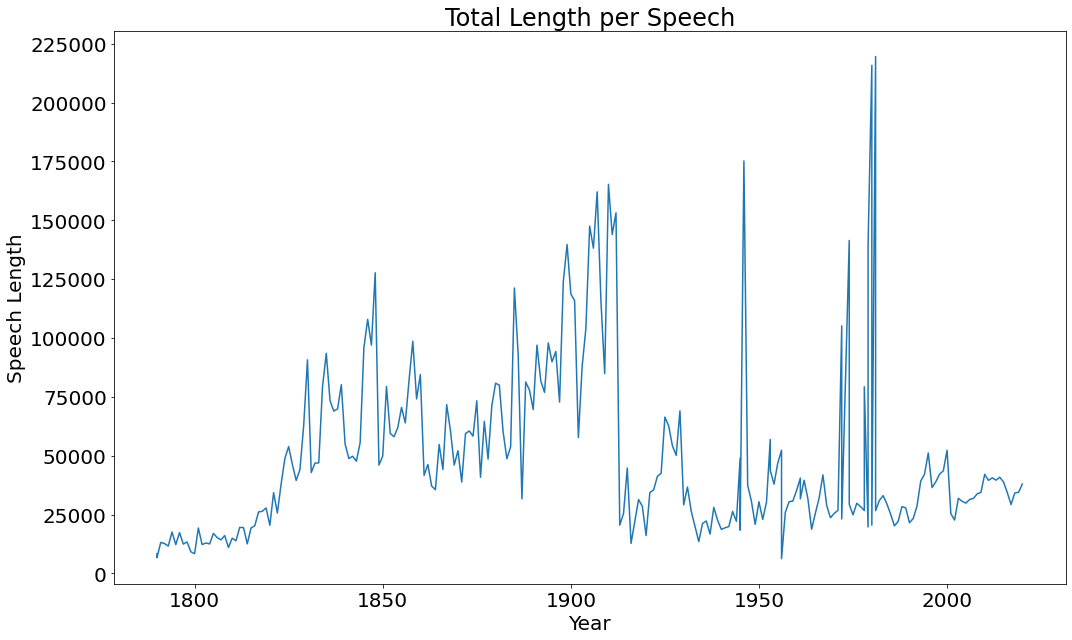

In [34]:
# plotting speech length against date

plt.figure(figsize = (15, 9))
plt.plot(sotu_speeches['Year'], sotu_speeches['Speech_length'], label = 'Speech Length (characters)')
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.xlabel('Year', size = 20)
plt.ylabel('Speech Length', size = 20)
plt.locator_params(axis='y', nbins=10)
plt.locator_params(axis='x', nbins=6)
plt.title('Total Length per Speech', size= 24)
plt.tight_layout();

In [35]:
# selecting analysis columns

sotu_formatted = sotu_speeches[['President', 'Year', 'Text']]
sotu_formatted.head(2)

,President,Year,Text
241,George Washington,1790,Fellow-Citizens of the Senate and House of Rep...
240,George Washington,1790,Fellow-Citizens of the Senate and House of Rep...


In [36]:
sotu_formatted.dtypes

President    object
Year          int64
Text         object
dtype: object

In [37]:
# exporting to CSV

sotu_formatted.to_csv('../data/prediction_data/formatted_pred_data/sotu_formatted.csv', index = False)

***Supreme Court Decisions***

In [38]:
# importing dataset and checking document lengths (had to adjust system params for this import due to size)

court = pd.read_csv('../data/prediction_data/raw_pred_data/supreme_court_decisions.csv', engine = 'python')
court.head(2)

,author_name,category,per_curiam,case_name,date_filed,federal_cite_one,absolute_url,cluster,year_filed,scdb_id,scdb_decision_direction,scdb_votes_majority,scdb_votes_minority,text
0,justice roberts,majority,False,McCutcheon v. Federal Election Comm'n,2014-04-02,134 S. Ct. 1434,https://www.courtlistener.com/opinion/2659301/...,https://www.courtlistener.com/api/rest/v3/clus...,2014,2013-033,1.0,5.0,4.0,There is no right more basic in our democracy ...
1,justice thomas,concurring,False,McCutcheon v. Federal Election Comm'n,2014-04-02,134 S. Ct. 1434,https://www.courtlistener.com/opinion/2659301/...,https://www.courtlistener.com/api/rest/v3/clus...,2014,2013-033,1.0,5.0,4.0,I adhere to the view that this Courtâ€™s decis...


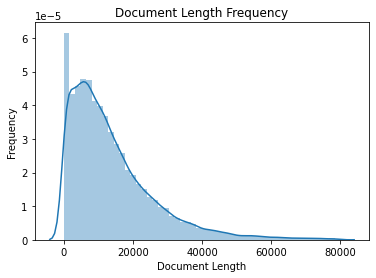

In [39]:
court_lengths = []
for text in court['text']:
    court_lengths.append(len(text))
    
sns.distplot([x for x in court_lengths if x < 80000])
plt.xlabel('Document Length')
plt.ylabel('Frequency')
plt.title('Document Length Frequency');

In [40]:
court.shape

(34878, 14)

In [41]:
# selecting analysis columns and converting to datetime

court_formatted = court[['author_name', 'date_filed', 'scdb_decision_direction', 'scdb_votes_majority', 'scdb_votes_minority', 'text']]

In [42]:
court_formatted['date_filed'] = pd.to_datetime(court_formatted['date_filed'])

C:\Users\griff\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
court_formatted.dtypes

author_name                        object
date_filed                 datetime64[ns]
scdb_decision_direction           float64
scdb_votes_majority               float64
scdb_votes_minority               float64
text                               object
dtype: object

In [44]:
# exporting to CSV

court_formatted.to_csv('../data/prediction_data/formatted_pred_data/court_formatted.csv', index = False)

***DOJ Press Releases***

In [45]:
# importing and converting to datetime / selecting columns

doj = pd.read_json('../data/prediction_data/raw_pred_data/doj_press_releases.json', lines = True)
doj.head(2)

,id,title,contents,date,topics,components
0,None,Convicted Bomb Plotter Sentenced to 30 Years,"PORTLAND, Oregon. – Mohamed Osman Mohamud, 23,...",2014-10-01T00:00:00-04:00,[],[National Security Division (NSD)]
1,12-919,$1 Million in Restitution Payments Announced t...,WASHINGTON – North Carolina’s Waccamaw River...,2012-07-25T00:00:00-04:00,[],[Environment and Natural Resources Division]


In [46]:
doj['date'] = pd.to_datetime(doj['date'])

In [47]:
doj_formatted = doj[['title', 'contents', 'date']]

In [48]:
doj_formatted.head(3)

,title,contents,date
0,Convicted Bomb Plotter Sentenced to 30 Years,"PORTLAND, Oregon. – Mohamed Osman Mohamud, 23,...",2014-10-01 00:00:00-04:00
1,$1 Million in Restitution Payments Announced t...,WASHINGTON – North Carolina’s Waccamaw River...,2012-07-25 00:00:00-04:00
2,$1 Million Settlement Reached for Natural Reso...,BOSTON– A $1-million settlement has been...,2011-08-03 00:00:00-04:00


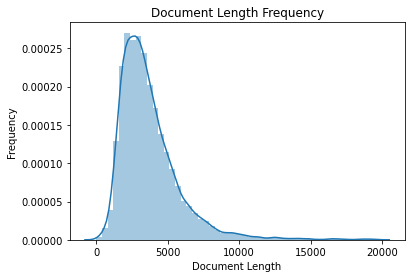

In [55]:
doj_lengths = []
for text in [x for x in doj['contents'] if len(x) < 20000]:
    doj_lengths.append(len(text))
    
sns.distplot(doj_lengths)
plt.xlabel('Document Length')
plt.ylabel('Frequency')
plt.title('Document Length Frequency');

In [50]:
# exporting to CSV

doj_formatted.to_csv('../data/prediction_data/formatted_pred_data/doj_formatted.csv', index = False)